<a href="https://colab.research.google.com/github/jananigs/Yelp-NLP/blob/main/yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##/content/drive/MyDrive/Colab Notebooks/yelp.csvb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp.csv')

# Data Analysis

In [4]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
df.describe(include=object)

,business_id,date,review_id,text,type,user_id
count,10000,10000,10000,10000,10000,10000
unique,4174,1995,10000,9998,1,6403
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,Great service,review,fczQCSmaWF78toLEmb0Zsw
freq,37,21,1,2,10000,38


In [8]:
df.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

# Feature Creation

In [9]:
df['text_length']=df['text'].apply(len)
df.sample(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
4930,hCS5eV0SCAY9LeeL36lz8g,2010-03-27,rDx51E3lGkco_J_YXSFcXQ,3,Last night (Friday night) was the first time I...,review,SSXLiQkrdPLd2YJhNyojhw,0,2,0,1085
6130,Y7aesBLKUPTrQsuzcce-DQ,2011-04-20,9woYJf6zPsuCFH6YYxKrRw,1,I can summarize this in one word. YUCK! We w...,review,tuuFkFLywRizZz1rI8JVMg,0,1,0,577


# EDA

In [10]:
sns.set_style('white')

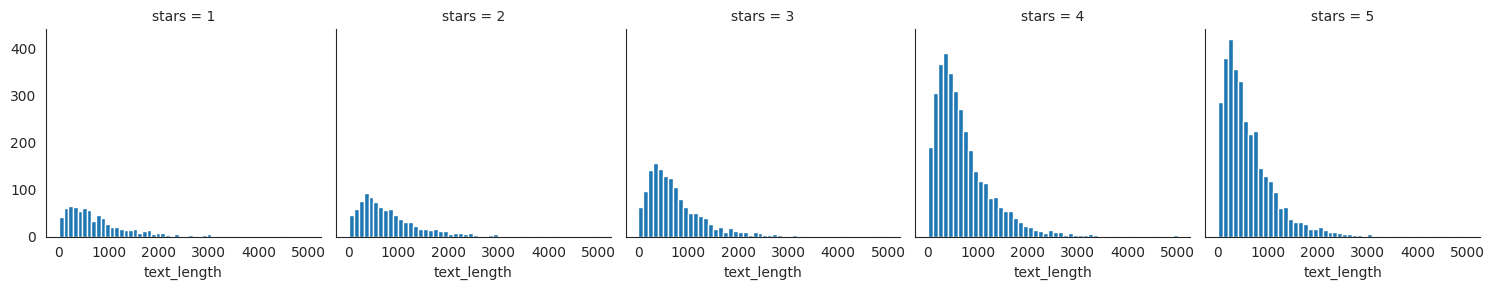

In [11]:
g = sns.FacetGrid(df, col='stars')
g.map(plt.hist, 'text_length', bins=50)

<Axes: xlabel='stars', ylabel='text_length'>

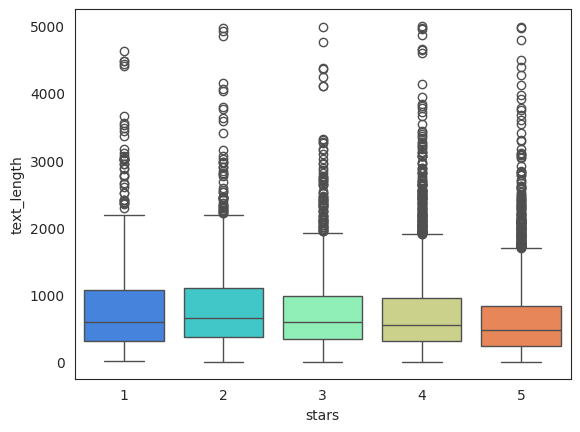

In [12]:
sns.boxplot(x='stars', y='text_length', data=df, palette='rainbow')

<Axes: xlabel='stars', ylabel='count'>

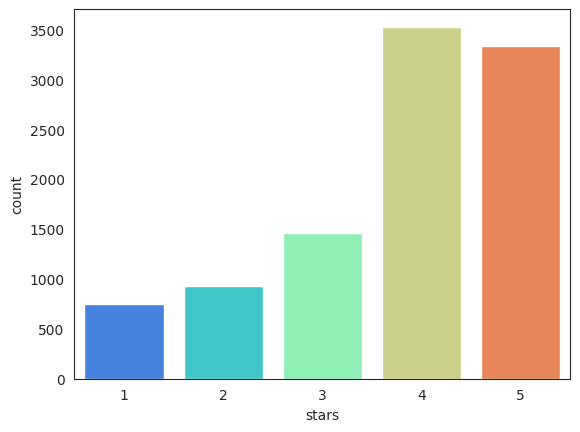

In [13]:
sns.countplot(x='stars', data=df, palette='rainbow')

In [14]:
ratings = df.iloc[:,[3]+list(range(-4,0))]
ratings.head()

,stars,cool,useful,funny,text_length
0,5,2,5,0,889
1,5,0,0,0,1345
2,4,0,1,0,76
3,5,1,2,0,419
4,5,0,0,0,469


<Axes: >

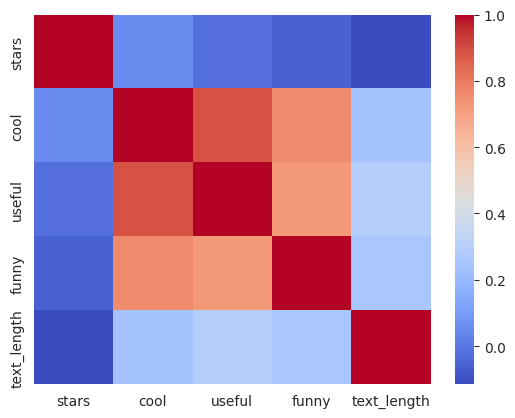

In [15]:
sns.heatmap(ratings.corr(), cmap='coolwarm')

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
import string

def text_process(txt):
  no_punc=[chr for chr in txt if chr not in string.punctuation]
  out_txt=''.join(no_punc)
  out_list = [word for word in out_txt.split() if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
  return " ".join(out_list)

In [18]:
df_3stars = df[df['stars']==3]['text']
df_3stars.head(5)
df_3stars = df_3stars.apply(text_process)
df_3stars.head(1)

16    went Saturday afternoon place incredibly empty...
Name: text, dtype: object

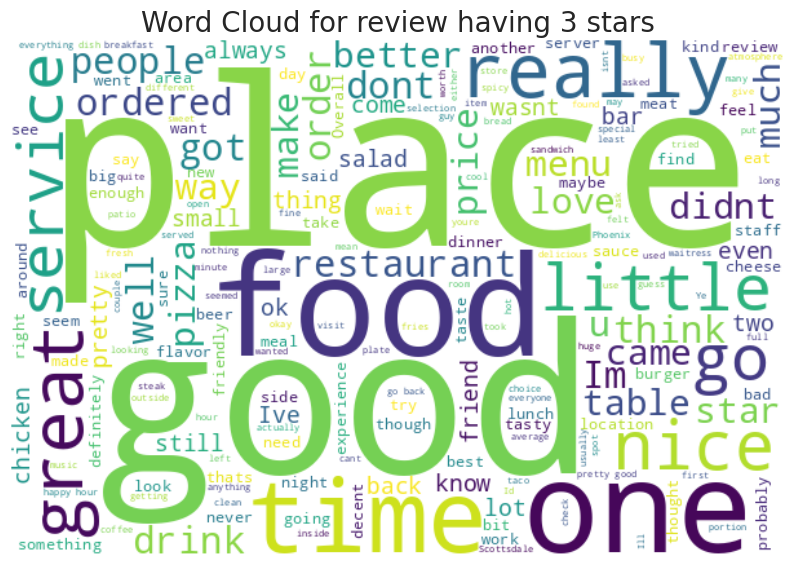

In [19]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white',width=600,height=400).generate(" ".join(df_3stars))

plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Cloud for review having 3 stars",fontsize=20)
plt.axis('off')
plt.show()

### Classfying the data into negative if the stars column has value 1 or 2 and positive if the stars column has value 4 or 5. For the data with stars column having value 3, as per the word cloud, most of it are positive. So classifying the data into positive if stars column has value 3.

In [20]:
df['rating_classification'] = np.where(df['stars']>=3,1,0)
df.sample(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length,rating_classification
5743,WowrRUKvjiLX4zT12xU_yw,2012-07-09,ofhF4RuqsymES6pQfO2KWw,4,I seriously love this store. I wish I didn't l...,review,palND-kF1qpMLhkcgAnSxA,2,3,3,401,1
6170,Zh_y9AmSfWZpR2JB9wye-A,2011-03-15,iW7lIo3fEtYIJ6RX52kDNw,2,"Liked the theme, didn't care for the execution...",review,LogquRKfP0EPKJ3hdpB4-g,0,1,0,162,0


In [21]:
x = df['text']
y = df['rating_classification']

In [22]:
x = x.apply(text_process)
x.head(5)

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
2    love gyro plate Rice good also dig candy selec...
3    Rosie Dakota LOVE Chaparral Dog Park convenien...
4    General Manager Scott Petello good egg go deta...
Name: text, dtype: object

In [23]:
nltk.download('wordnet')
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(txt):
  out_list = [lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(txt) ]
  return " ".join(out_list)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
x = x.apply(lemmatize_text)
x.head(5)

0    wife took birthday breakfast excellent weather...
1    idea people give bad review place go show plea...
2    love gyro plate Rice good also dig candy selec...
3    Rosie Dakota LOVE Chaparral Dog Park convenien...
4    General Manager Scott Petello good egg go deta...
Name: text, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(x).toarray()

In [26]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5000)
(2000, 5000)
(8000,)
(2000,)


In [28]:
y_train.value_counts()

rating_classification
1    6659
0    1341
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
x_train,y_train = sm.fit_resample(x_train,y_train)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13318, 5000)
(2000, 5000)
(13318,)
(2000,)


In [31]:
y_train.value_counts()

rating_classification
0    6659
1    6659
Name: count, dtype: int64

Test Accuracy: 0.8665
F1_score: 0.9184732824427481


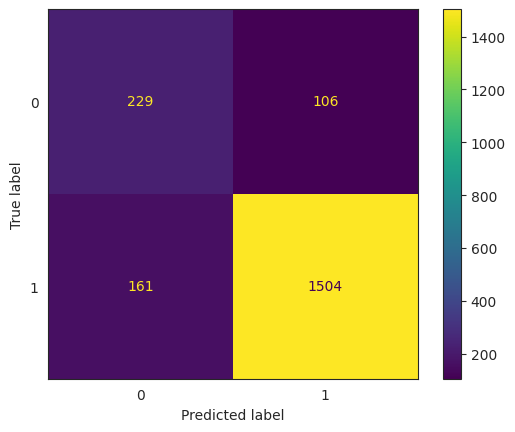

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)

y_pred = nb_model.predict(x_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('F1_score:', f1_score(y_test,y_pred))

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [34]:
x_train.shape

(13318, 5000)

In [35]:
model = Sequential([
    Dense(units=5000, kernel_initializer='he_uniform',input_dim=5000),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=3000, kernel_initializer='he_uniform',activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=2000, kernel_initializer='glorot_uniform',activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=1000, kernel_initializer='glorot_uniform',activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=1,activation='sigmoid')
])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
model_history = model.fit(x_train,y_train,validation_split=0.3, batch_size=32, epochs=30,callbacks=[early_stopping])

Epoch 1/30
292/292 [==============================] - 260s 879ms/step - loss: 0.5605 - accuracy: 0.7920 - val_loss: 0.8615 - val_accuracy: 0.3696
Epoch 2/30
292/292 [==============================] - 269s 922ms/step - loss: 0.2612 - accuracy: 0.8981 - val_loss: 0.1325 - val_accuracy: 0.9652
Epoch 3/30
292/292 [==============================] - 266s 912ms/step - loss: 0.2030 - accuracy: 0.9222 - val_loss: 0.1157 - val_accuracy: 0.9647
Epoch 4/30
292/292 [==============================] - 278s 954ms/step - loss: 0.1807 - accuracy: 0.9302 - val_loss: 0.1103 - val_accuracy: 0.9700
Epoch 5/30
292/292 [==============================] - 259s 889ms/step - loss: 0.1563 - accuracy: 0.9383 - val_loss: 0.0935 - val_accuracy: 0.9697
Epoch 6/30
292/292 [==============================] - 274s 939ms/step - loss: 0.1255 - accuracy: 0.9502 - val_loss: 0.0673 - val_accuracy: 0.9767
Epoch 7/30
292/292 [==============================] - 258s 884ms/step - loss: 0.1305 - accuracy: 0.9513 - val_loss: 0.0839 -

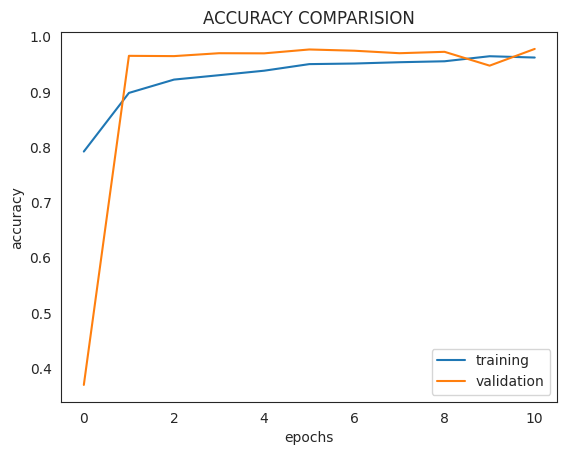

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc=4)
plt.title('ACCURACY COMPARISION')
plt.show()

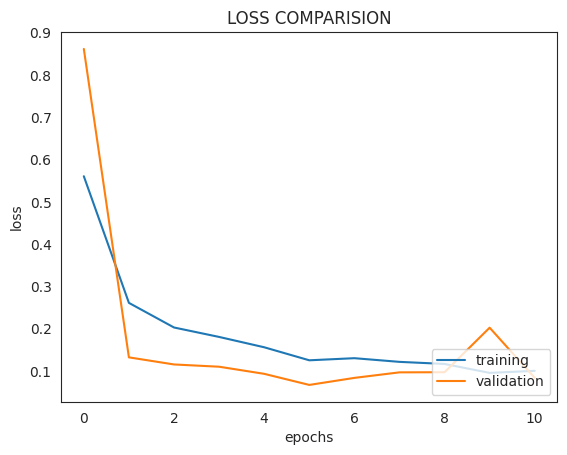

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc=4)
plt.title('LOSS COMPARISION')
plt.show()

63/63 [==============================] - 7s 113ms/step


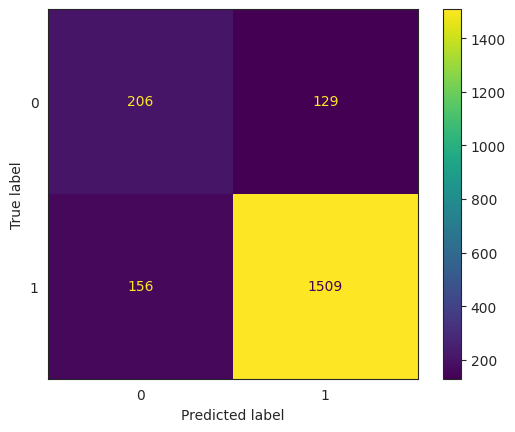

0.8575


In [40]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
score = accuracy_score(y_pred, y_test)
print(score)

Test Accuracy: 0.847
F1_score: 0.9060196560196561


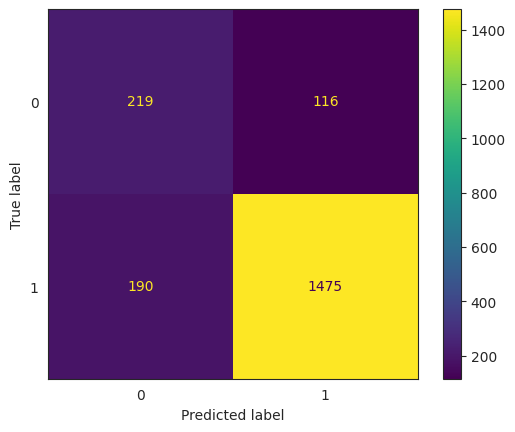

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('F1_score:', f1_score(y_test,y_pred))

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## Testing with new inputs

In [50]:
x_new = "This place is very nice. Has got good ambience and great service. People in Coimbatore must visit this cafe. It is kids friendly but not pet friendly"
x_new = text_process(x_new)
x_new = lemmatize_text(x_new)
x_new = cv.transform([x_new]).toarray()

y_pred_new=model.predict(x_new)
y_pred_new>0.5

1/1 [==============================] - 0s 97ms/step


array([[ True]])

In [ ]:
y_pred_new_nb = nb_model.predict(x_new)
y_pred_new_nb

In [ ]:
y_pred_new_lr = lr.predict(x_new)
y_pred_new_lr

In [57]:
x_new = "This place is not nice. Has got bad ambience and worst service. The coffee served was pathetic and no proper arrangements for parking"
x_new = text_process(x_new)
x_new = lemmatize_text(x_new)
x_new = cv.transform([x_new]).toarray()

y_pred_new=model.predict(x_new)
y_pred_new>0.5
print(y_pred_new)

1/1 [==============================] - 0s 73ms/step
[[0.0003219]]


In [58]:
y_pred_new_nb = nb_model.predict(x_new)
y_pred_new_nb

array([0])

In [59]:
y_pred_new_lr = lr.predict(x_new)
y_pred_new_lr

array([0])

In [48]:
import pickle
#pickle.dump({'text_process': text_process, 'lemmatize_text': lemmatize_text,'cv':cv, 'model': nb_model}, open('/content/drive/MyDrive/Colab Notebooks/yelp_nb_model.pkl','wb'))
pickle.dump({'nn_model':model,'nb_model':nb_model,'lr_model':lr,'cv':cv,}, open('/content/drive/MyDrive/Colab Notebooks/yelp_nb_model.pkl','wb'))

In [ ]:
objects = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/yelp_nb_model.pkl','rb'))
print(objects)